In [1]:
pip install opencv-python matplotlib

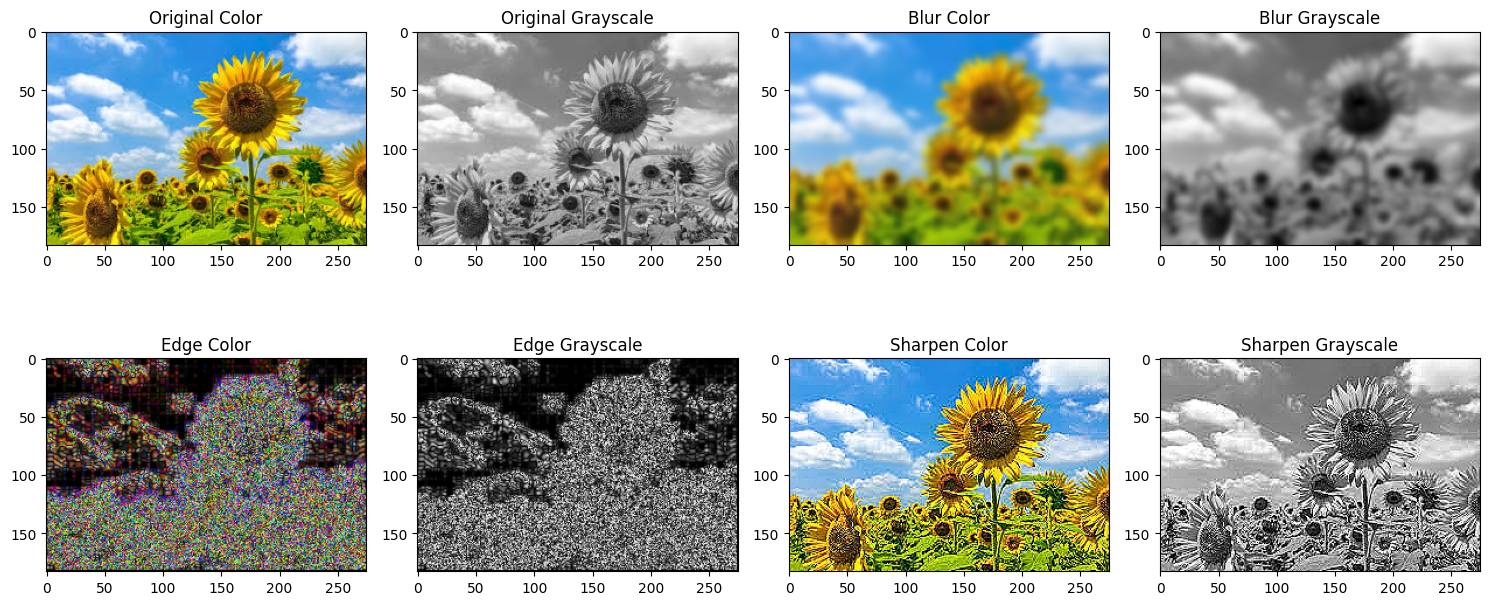

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/bunga.jfif')  # Ganti dengan path gambar Anda
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB untuk tampilan yang benar
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Low-Pass Filter (Gaussian Blur)
color_blur = cv2.GaussianBlur(color_image, (15, 15), 0)
gray_blur = cv2.GaussianBlur(gray_image, (15, 15), 0)

# High-Pass Filter (Edge Detection - Sobel)
color_edges = cv2.Sobel(color_image, cv2.CV_64F, 1, 1, ksize=5)
gray_edges = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)

# High-Boost Filter (Sharpening)
# Membuat kernel untuk sharpening
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
color_sharpen = cv2.filter2D(color_image, -1, sharpen_kernel)
gray_sharpen = cv2.filter2D(gray_image, -1, sharpen_kernel)

# Menampilkan hasil
plt.figure(figsize=(15, 10))

# Asli
plt.subplot(3, 4, 1), plt.imshow(color_image), plt.title('Original Color')
plt.subplot(3, 4, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Original Grayscale')

# Low-Pass Filter (Blur)
plt.subplot(3, 4, 3), plt.imshow(color_blur), plt.title('Blur Color')
plt.subplot(3, 4, 4), plt.imshow(gray_blur, cmap='gray'), plt.title('Blur Grayscale')

# High-Pass Filter (Edge Detection)
plt.subplot(3, 4, 5), plt.imshow(np.abs(color_edges).astype(np.uint8)), plt.title('Edge Color')
plt.subplot(3, 4, 6), plt.imshow(np.abs(gray_edges).astype(np.uint8), cmap='gray'), plt.title('Edge Grayscale')

# High-Boost Filter (Sharpening)
plt.subplot(3, 4, 7), plt.imshow(color_sharpen), plt.title('Sharpen Color')
plt.subplot(3, 4, 8), plt.imshow(gray_sharpen, cmap='gray'), plt.title('Sharpen Grayscale')

plt.tight_layout()
plt.show()
